In [1]:
import glob
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem.Draw import IPythonConsole # Enables RDKit IPython integration
from rdkit.Chem import PandasTools
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path_to_library = '/home/paula/Masterarbeit/FragmentLibrary/'

# list of folders for each subpocket
subpockets = ['AP', 'FP', 'SE', 'GA', 'B1', 'B2']
folders = [path_to_library+subpocket for subpocket in subpockets]

In [3]:
# read data

data = pd.DataFrame()

rdkit_gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)

# iterate over subpockets
for i, folder in enumerate(folders):
    
    subpocket = subpockets[i]

    file = folder+'/'+subpocket+'.sdf' 
    df = PandasTools.LoadSDF(file, includeFingerprints=True, embedProps=True)
    df['NumHeavyAtoms'] = df.apply(lambda x: x['ROMol'].GetNumHeavyAtoms(), axis=1)
        
    fragments = []
    fingerprints = []
    smiles =[]

    for frag in df.ROMol:
        # remove dummy atoms from fragments and create smiles
        du = Chem.MolFromSmiles('*')
        h = Chem.MolFromSmiles('[H]', sanitize=False)
        fixed_frag = AllChem.ReplaceSubstructs(frag, du, h, replaceAll=True)[0]
        fixed_frag = Chem.RemoveHs(fixed_frag)
        fragments.append(fixed_frag)
        # fingerprint of fragment
        fingerprints.append(rdkit_gen.GetFingerprint(fixed_frag))
        # smiles for comparing fragments
        smiles.append(Chem.MolToSmiles(fixed_frag))
      
    df['smiles'] = smiles
    df['fragment'] = fragments
    df['fingerprint'] = fingerprints
    df['subpocket'] = subpocket
    
    data = data.append(df)
    
data = data.reset_index(drop=True)
data.shape

RDKit ERROR: [11:31:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:30] Unexpected error hit on line 65
RDKit ERROR: [11:31:30] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 20 < 20
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:30] Unexpected error hit on line 161
RDKit ERROR: [11:31:30] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file 

RDKit ERROR: [11:31:30] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:30] Unexpected error hit on line 11341
RDKit ERROR: [11:31:30] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:30] Unexpected error hit on line 11406
RDKit ERROR: [11:31:30] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Ran

RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:30] Unexpected error hit on line 23785
RDKit ERROR: [11:31:30] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:30] Unexpected error hit on line 23850
RDKit ERROR: [11:31:30] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expr

RDKit ERROR: [11:31:31] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:31] Unexpected error hit on line 36963
RDKit ERROR: [11:31:31] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:31] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:31] Unexpected error hit on line 37029
RDKit ERROR: [11:31:31] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:31] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in 

RDKit ERROR: [11:31:31] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 20 < 20
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:31] Unexpected error hit on line 49712
RDKit ERROR: [11:31:31] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:31] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 21 < 21
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:31] Unexpected error hit on line 49817
RDKit ERROR: [11:31:31] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:31] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in 

RDKit ERROR: [11:31:31] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:31] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:31] Unexpected error hit on line 63092
RDKit ERROR: [11:31:31] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:31] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:31] Unexpected error hit on line 63166
RDKit ERROR: [11:31:31] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:31] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [11:31:31] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:31] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 17 < 17
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:31] Unexpected error hit on line 75714
RDKit ERROR: [11:31:31] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:31] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:31] Unexpected error hit on line 75772
RDKit ERROR: [11:31:31] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:31] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [11:31:31] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:31] Unexpected error hit on line 88545
RDKit ERROR: [11:31:31] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:31] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:31] Unexpected error hit on line 88612
RDKit ERROR: [11:31:31] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:31] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in 

RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:32] Unexpected error hit on line 100952
RDKit ERROR: [11:31:32] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:32] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:32] Unexpected error hit on line 101015
RDKit ERROR: [11:31:32] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:32] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Ex

RDKit ERROR: [11:31:32] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:32] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:32] Unexpected error hit on line 113264
RDKit ERROR: [11:31:32] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:32] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 5 < 5
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:32] Unexpected error hit on line 113309
RDKit ERROR: [11:31:32] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:32] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [11:31:32] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:32] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:32] Unexpected error hit on line 125799
RDKit ERROR: [11:31:32] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:32] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:32] Unexpected error hit on line 125868
RDKit ERROR: [11:31:32] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:32] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR:

RDKit ERROR: [11:31:32] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:32] Unexpected error hit on line 139632
RDKit ERROR: [11:31:32] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:32] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 18 < 18
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:32] Unexpected error hit on line 139722
RDKit ERROR: [11:31:32] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:32] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in 

RDKit ERROR: [11:31:32] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:32] Unexpected error hit on line 152664
RDKit ERROR: [11:31:32] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:32] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:32] Unexpected error hit on line 152729
RDKit ERROR: [11:31:32] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:32] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in 

RDKit ERROR: [11:31:33] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:33] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:33] Unexpected error hit on line 165151
RDKit ERROR: [11:31:33] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:33] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:33] Unexpected error hit on line 165220
RDKit ERROR: [11:31:33] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:33] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR:

RDKit ERROR: [11:31:33] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:33] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:33] Unexpected error hit on line 178786
RDKit ERROR: [11:31:33] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:33] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:33] Unexpected error hit on line 178855
RDKit ERROR: [11:31:33] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:33] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR:

RDKit ERROR: [11:31:33] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:35] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:35] Unexpected error hit on line 56
RDKit ERROR: [11:31:35] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:35] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:35] Unexpected error hit on line 116
RDKit ERROR: [11:31:35] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:35] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Erro

RDKit ERROR: [11:31:36] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:36] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 22 < 22
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:36] Unexpected error hit on line 14497
RDKit ERROR: [11:31:36] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:36] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:36] Unexpected error hit on line 14569
RDKit ERROR: [11:31:36] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:36] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [11:31:36] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:36] Unexpected error hit on line 27841
RDKit ERROR: [11:31:36] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:36] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 17 < 17
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:36] Unexpected error hit on line 27930
RDKit ERROR: [11:31:36] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:36] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in 

RDKit ERROR: [11:31:36] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:36] Unexpected error hit on line 41579
RDKit ERROR: [11:31:36] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:36] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 6 < 6
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:36] Unexpected error hit on line 41639
RDKit ERROR: [11:31:36] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:36] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file

RDKit ERROR: [11:31:36] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:36] Unexpected error hit on line 55109
RDKit ERROR: [11:31:36] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:36] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:36] Unexpected error hit on line 55167
RDKit ERROR: [11:31:36] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:36] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in fi

RDKit ERROR: [11:31:36] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 18 < 18
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:36] Unexpected error hit on line 65763
RDKit ERROR: [11:31:36] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:36] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:36] Unexpected error hit on line 65823
RDKit ERROR: [11:31:36] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:36] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in fi

RDKit ERROR: [11:31:37] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 15 < 15
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:37] Unexpected error hit on line 79929
RDKit ERROR: [11:31:37] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 5 < 5
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:37] Unexpected error hit on line 79978
RDKit ERROR: [11:31:37] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Ran

RDKit ERROR: [11:31:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 19 < 19
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:37] Unexpected error hit on line 93822
RDKit ERROR: [11:31:37] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:37] Unexpected error hit on line 93891
RDKit ERROR: [11:31:37] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in 

RDKit ERROR: [11:31:37] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 5 < 5
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:37] Unexpected error hit on line 108440
RDKit ERROR: [11:31:37] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:37] Unexpected error hit on line 108511
RDKit ERROR: [11:31:37] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [11:31:37] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:37] Unexpected error hit on line 123271
RDKit ERROR: [11:31:37] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:37] Unexpected error hit on line 123336
RDKit ERROR: [11:31:37] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR:

RDKit ERROR: [11:31:37] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:39] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:39] Unexpected error hit on line 56
RDKit ERROR: [11:31:39] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:39] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:39] Unexpected error hit on line 134
RDKit ERROR: [11:31:39] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:39] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Er

RDKit ERROR: [11:31:39] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 17 < 17
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:39] Unexpected error hit on line 12368
RDKit ERROR: [11:31:39] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:39] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 5 < 5
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:39] Unexpected error hit on line 12419
RDKit ERROR: [11:31:39] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:39] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in fi

RDKit ERROR: [11:31:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:40] Unexpected error hit on line 25427
RDKit ERROR: [11:31:40] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:40] Unexpected error hit on line 25487
RDKit ERROR: [11:31:40] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file

RDKit ERROR: [11:31:40] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:40] Unexpected error hit on line 39590
RDKit ERROR: [11:31:40] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:40] Unexpected error hit on line 39655
RDKit ERROR: [11:31:40] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [11:31:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 17 < 17
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:40] Unexpected error hit on line 51636
RDKit ERROR: [11:31:40] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 17 < 17
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:40] Unexpected error hit on line 51733
RDKit ERROR: [11:31:40] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in 

RDKit ERROR: [11:31:40] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:40] Unexpected error hit on line 63833
RDKit ERROR: [11:31:40] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 15 < 15
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:40] Unexpected error hit on line 63926
RDKit ERROR: [11:31:40] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [11:31:40] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:40] Unexpected error hit on line 75881
RDKit ERROR: [11:31:40] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 4 < 4
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:40] Unexpected error hit on line 75933
RDKit ERROR: [11:31:40] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range

RDKit ERROR: [11:31:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:41] Unexpected error hit on line 89339
RDKit ERROR: [11:31:41] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:41] Unexpected error hit on line 89425
RDKit ERROR: [11:31:41] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in 

RDKit ERROR: [11:31:41] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 15 < 15
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:41] Unexpected error hit on line 102067
RDKit ERROR: [11:31:41] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:41] Unexpected error hit on line 102161
RDKit ERROR: [11:31:41] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR:

RDKit ERROR: [11:31:41] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:42] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 5 < 5
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:42] Unexpected error hit on line 45
RDKit ERROR: [11:31:42] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:42] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:42] Unexpected error hit on line 105
RDKit ERROR: [11:31:42] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:42] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Erro

RDKit ERROR: [11:31:43] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 15 < 15
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:43] Unexpected error hit on line 10462
RDKit ERROR: [11:31:43] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:43] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 6 < 6
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:43] Unexpected error hit on line 10526
RDKit ERROR: [11:31:43] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:43] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in fi

RDKit ERROR: [11:31:43] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:43] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:43] Unexpected error hit on line 20701
RDKit ERROR: [11:31:43] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:43] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:43] Unexpected error hit on line 20773
RDKit ERROR: [11:31:43] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:43] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [11:31:43] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:43] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 6 < 6
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:43] Unexpected error hit on line 29695
RDKit ERROR: [11:31:43] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:43] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:43] Unexpected error hit on line 29753
RDKit ERROR: [11:31:43] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:43] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range

RDKit ERROR: [11:31:43] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:43] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:43] Unexpected error hit on line 40214
RDKit ERROR: [11:31:43] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:43] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:43] Unexpected error hit on line 40272
RDKit ERROR: [11:31:43] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:43] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range

RDKit ERROR: [11:31:43] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:43] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:43] Unexpected error hit on line 51006
RDKit ERROR: [11:31:43] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:43] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:43] Unexpected error hit on line 51078
RDKit ERROR: [11:31:43] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:43] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Ran

RDKit ERROR: [11:31:44] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:44] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:44] Unexpected error hit on line 54
RDKit ERROR: [11:31:44] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:44] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:44] Unexpected error hit on line 118
RDKit ERROR: [11:31:44] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:44] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Erro

RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:45] Unexpected error hit on line 1617
RDKit ERROR: [11:31:45] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:31:45] Unexpected error hit on line 1692
RDKit ERROR: [11:31:45] ERROR: moving to the begining of the next molecule
RDKit ERROR: [11:31:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMo

(7197, 16)

In [4]:
n_frags_per_sp = {}
for sp in subpockets:
    n_frags_per_sp[sp] = data[data.subpocket == sp].shape[0]
n_frags_per_sp

{'AP': 2559, 'FP': 1865, 'SE': 1560, 'GA': 1023, 'B1': 98, 'B2': 92}

Similarity of fragments between the kinase groups:

In [5]:
groups = data.group.unique()

In [6]:
# matrix with mean similarites between groups 
sim_matrix1 = pd.DataFrame(0, index=groups, columns=groups)
# matrix with mean similarities between groups averaged over subpockets
sim_matrix = pd.DataFrame(0, index=groups, columns=groups)
# one similarity matrix for each subpocket
sim_matrices = {}
for sp in subpockets:
    sim_matrices[sp] = pd.DataFrame(0, index=groups, columns=groups)

# iterate over groups
for g1 in groups:
    for g2 in groups:
        
        dg1 = data[data.group==g1]
        dg2 = data[data.group==g2]
        
        sum_all_sims = 0
        count_all_sims = 0
        sum_mean_sims = 0
        count_sps = 0
        # iterate over subpockets
        for sp in subpockets:
            
            dg1sp = dg1[dg1.subpocket==sp]
            dg2sp = dg2[dg2.subpocket==sp]
            
            if dg1sp.empty or dg2sp.empty:
                sim_matrices[sp].loc[g1,g2] = None
                continue
            
            count_sims = 0
            sum_sims = 0
            # iterate over fragment pairs
            for i, fp1 in enumerate(dg1sp.fingerprint):
                for j, fp2 in enumerate(dg2sp.fingerprint):
                    
                    if g1 != g2 or i != j:
                        sim = DataStructs.FingerprintSimilarity(fp1, fp2) # tanimoto similarity
                        sum_sims += sim
                        sum_all_sims += sim
                        count_sims += 1
                        count_all_sims += 1
            
            # if nothing was compared
            if count_sims == 0:
                sim_matrices[sp].loc[g1,g2] = None
                continue
                        
            mean_sim = sum_sims/count_sims  
            sum_mean_sims += mean_sim
            count_sps += 1
            sim_matrices[sp].loc[g1,g2] = mean_sim
   
        sim_matrix1.loc[g1,g2] = sum_all_sims/count_all_sims
        
        sim_matrix.loc[g1, g2] = sum_mean_sims/count_sps

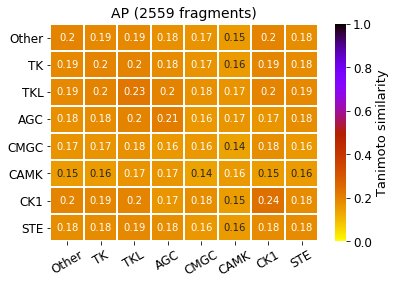

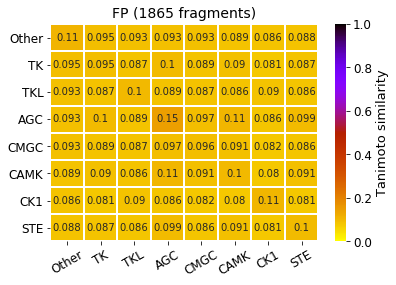

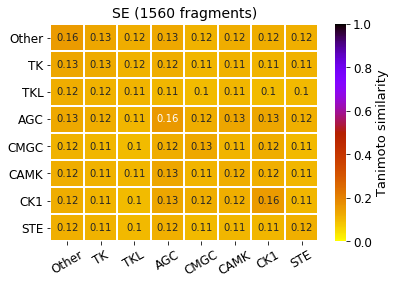

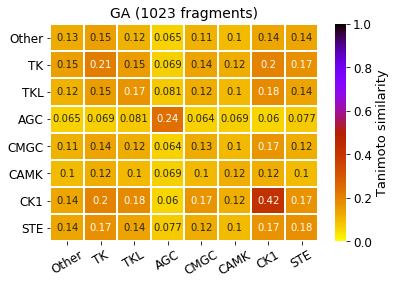

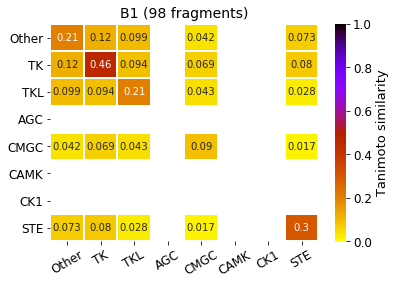

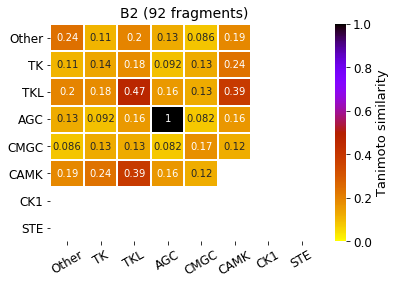

In [7]:
for sp in subpockets:
    ax = sns.heatmap(sim_matrices[sp], linewidths=1, annot=True, annot_kws={"size": 10}, cbar_kws={"label": "Tanimoto similarity"}, cmap="gnuplot_r",
               vmin=0, vmax=1)
    plt.title(sp+' ('+str(n_frags_per_sp[sp])+' fragments)', fontsize=14)
    plt.xticks(fontsize=12, rotation=30)
    plt.yticks(fontsize=12)
    ax.figure.axes[-1].yaxis.label.set_size(13)
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=12)
    plt.show()

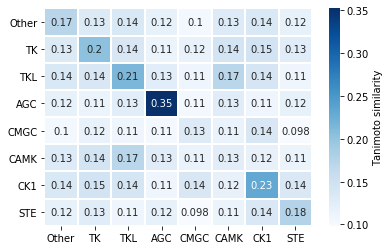

In [8]:
sns.heatmap(sim_matrix, linewidths=1, annot=True, cbar_kws={"label": "Tanimoto similarity"}, cmap="Blues")
plt.show()

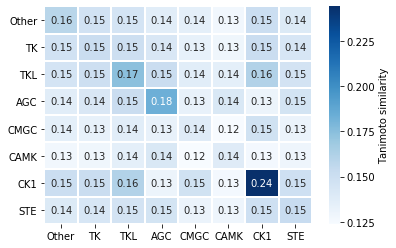

In [9]:
sns.heatmap(sim_matrix1, linewidths=1, annot=True, cbar_kws={"label": "Tanimoto similarity"}, cmap="Blues")
plt.show()

Similarity of fragments within kinase groups per subpocket:

In [10]:
sim_matrix = pd.DataFrame(0, index=groups, columns=['AP', 'FP', 'SE', 'GA', 'B1', 'B2'])
sims1 = pd.Series(0, index=groups)

sim_data = {}

# iterate over kinase groups
for group in groups:
    
    dg = data[data.group==group]
    
    sum_all_sims = 0
    count_all_sims = 0
    sim_data_group = []
    
    # iterate over subpockets
    for sp in subpockets:
        
        dgsp = dg[dg.subpocket==sp]
        
        sum_sims = 0
        count_sims = 0
        # iterate over fragment pairs
        for i, fp1 in enumerate(dgsp.fingerprint):
            for j, fp2 in enumerate(dgsp.fingerprint):
                
                if i != j:

                    sim = DataStructs.FingerprintSimilarity(fp1, fp2) # tanimoto similarity
                    sum_sims += sim
                    sum_all_sims += sim
                    count_sims += 1
                    count_all_sims += 1
                    sim_data_group.append(sim)
                    
        if count_sims == 0:
            sim_matrix.loc[group, sp] = None
            continue
                    
        mean_sim = sum_sims/count_sims
        sim_matrix.loc[group, sp] = mean_sim
        
    mean_group = sum_all_sims/count_all_sims
    sims1.loc[group] = mean_group
    
    sim_data[group] = sim_data_group

In [11]:
sim_df = pd.DataFrame(columns=['Tanimoto similarity'])
for group in groups:
    df = pd.DataFrame(sim_data[group], columns=['Tanimoto similarity'])
    df['group'] = group
    sim_df = sim_df.append(df)

/home/paula/anaconda3/envs/kffl/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Text(0, 0.5, 'Tanimoto similarity')

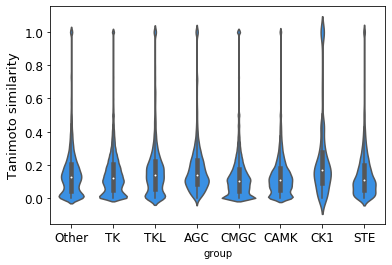

In [12]:
ax = sns.violinplot(x='group', y='Tanimoto similarity', data=sim_df, color='dodgerblue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Tanimoto similarity', fontsize=13)

Similarity within subpockets:

In [13]:
sims = pd.Series(0, index=subpockets)
sim_data = {}
count_equal = {}

# total similarity per subpocket
for sp in subpockets:
    
        dsp = data[data.subpocket==sp]
        sim_data_sp = []
        count_equal[sp] = 0
        
        sum_sims = 0
        count_sims = 0
        # iterate over fragment pairs
        for i, fp1 in enumerate(dsp.fingerprint):
            for j, fp2 in enumerate(dsp.fingerprint):
                
                if i != j:

                    sim = DataStructs.FingerprintSimilarity(fp1, fp2)
                    if sim == 1:
                        count_equal[sp] += 1
                    sim_data_sp.append(sim)
                    sum_sims += sim # tanimoto similarity
                    count_sims += 1
                    
        if count_sims == 0:
            sims.loc[sp] = None
            continue
                    
        mean_sim = sum_sims/count_sims
        sims.loc[sp] = mean_sim
        
        sim_data[sp] = sim_data_sp

In [14]:
def flatten_dict(d):
    
    lst = []
    for key in d:
        lst.extend(d[key])
    return lst

In [15]:
# Total distribution of similarities within subpockets
df = pd.DataFrame(data=flatten_dict(sim_data), columns=['Tanimoto similarity'])
df['group'] = 'Total'

Text(0, 0.5, 'Tanimoto similarity')

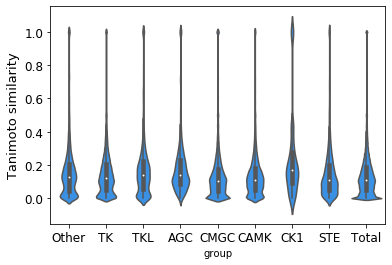

In [16]:
# same plot with Total distribution
sim_df = sim_df.append(df)
ax = sns.violinplot(x='group', y='Tanimoto similarity', data=sim_df, color='dodgerblue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.axhline(0.178, color='grey')
plt.ylabel('Tanimoto similarity', fontsize=13)

In [17]:
count_equal

{'AP': 27908, 'FP': 16516, 'SE': 17774, 'GA': 12550, 'B1': 782, 'B2': 550}

In [18]:
count_equal['AP']/len(sim_data['AP'])

0.0042634177431384

In [19]:
colors=['purple','forestgreen','c','tab:orange','tab:blue','darkslateblue']

In [20]:
subpockets = ['AP', 'FP', 'SE', 'GA', 'B1', 'B2']

In [21]:
sim_df = pd.DataFrame(columns=['Tanimoto similarity'])
for sp in subpockets:
    df = pd.DataFrame(sim_data[sp], columns=['Tanimoto similarity'])
    df['subpocket'] = sp
    sim_df = sim_df.append(df)

In [22]:
my_pal = {"AP": "purple", "FP": "forestgreen", "SE":"c", "GA":"tab:orange", "B1":"tab:blue", "B2":"darkslateblue"}

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

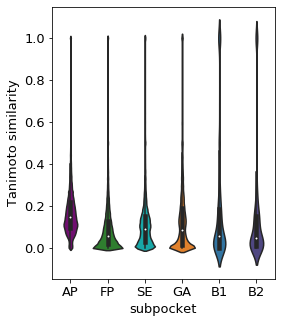

In [23]:
plt.figure(figsize=(4,5))
ax = sns.violinplot(x='subpocket', y='Tanimoto similarity', data=sim_df, palette=my_pal)
plt.ylabel('Tanimoto similarity', fontsize=13)
plt.xlabel('subpocket', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

In [24]:
sims

AP    0.170538
FP    0.092471
SE    0.117924
GA    0.133583
B1    0.173570
B2    0.141445
dtype: float64

In [25]:
sims1

Other    0.159143
TK       0.152034
TKL      0.174321
AGC      0.183483
CMGC     0.138754
CAMK     0.138666
CK1      0.244361
STE      0.152641
dtype: float64

In [26]:
sim_matrix.loc['Total'] = sims
sim_matrix['Total'] = sims1

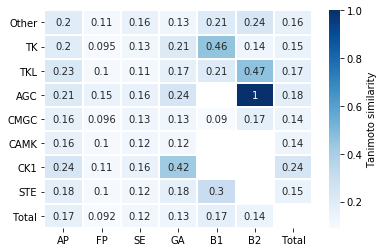

In [27]:
sns.heatmap(sim_matrix, linewidths=1, annot=True, cbar_kws={"label": "Tanimoto similarity"}, cmap="Blues")
plt.show()

In [28]:
n_frags = pd.DataFrame(0, index=groups, columns=['AP', 'FP', 'SE', 'GA', 'B1', 'B2'])

# iterate over kinase groups
for group in groups:
    
    dg = data[data.group==group]
    
    # iterate over subpockets
    for sp in subpockets:
        
        dgsp = dg[dg.subpocket==sp]
        
        n = dgsp.shape[0]
        n_frags.loc[group, sp] = n

Number of fragments in kinase groups:

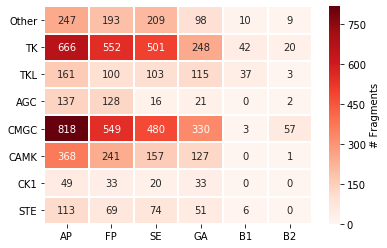

In [29]:
sns.heatmap(n_frags, linewidths=1, annot=True, cbar_kws={"label": "# Fragments"}, cmap="Reds", fmt='g')
plt.show()

In [30]:
# number of fragments per kinase group as bar plot
n_frags_per_group = n_frags.sum(axis=1)
n_frags_per_group

Other     766
TK       2029
TKL       519
AGC       304
CMGC     2237
CAMK      894
CK1       135
STE       313
dtype: int64

In [31]:
n_unique = pd.Series(0, index=groups)

# iterate over kinase groups
for group in groups:
    
    dg = data[data.group==group]
    
    # iterate over subpockets
    for sp in subpockets:
        
        dgsp = dg[dg.subpocket==sp]
        nu = dgsp.smiles.nunique()
        
        n_unique.loc[group] += nu
        

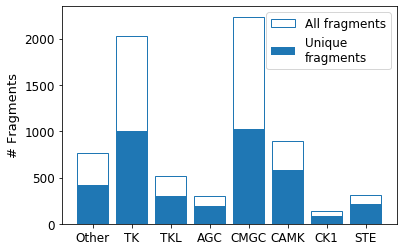

In [32]:
plt.figure()
plt.bar(groups, n_frags_per_group, fill=False, edgecolor='tab:blue')
plt.bar(groups, n_unique, color='tab:blue')
plt.legend(['All fragments', 'Unique\nfragments'], fontsize=12)
plt.ylabel('# Fragments', fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

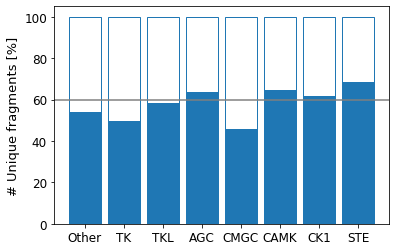

In [33]:
p_unique = np.asarray(n_unique)/np.asarray(n_frags_per_group)*100
plt.figure()
plt.bar(groups, [100 for x in groups], fill=False, edgecolor='tab:blue')
plt.bar(groups, p_unique, color='tab:blue')
plt.axhline(60, color='grey')
plt.ylabel('# Unique fragments [%]', fontsize=13)
plt.yticks(range(0,101,20), fontsize=12)
plt.xticks(fontsize=12)
plt.show()

Fragment distribution across subpockets in each kinase group:

In [34]:
# convert to relative numbers
n_frags.loc['Total'] = n_frags.sum()

In [35]:
total = n_frags.sum(axis=1)
for index, row in n_frags.iterrows():
    n_frags.loc[index] = row/total[index]

In [36]:
n_frags = n_frags*100

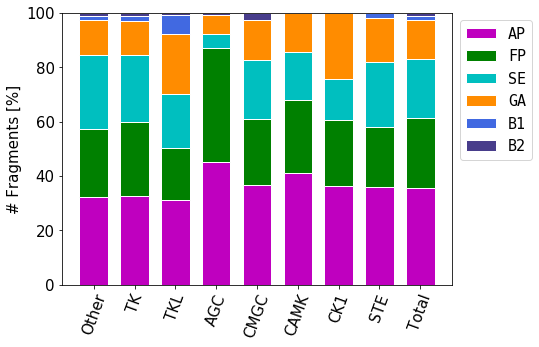

In [37]:
# n_frags as stacked bar plot
r = range(len(groups)+1)
df = n_frags
 
# plot
barWidth = 0.7

plt.figure(figsize=(7,5))
plt.bar(r, df['AP'], edgecolor='white', width=barWidth, color='m', label='AP')
plt.bar(r, df['FP'], bottom=df['AP'], edgecolor='white', width=barWidth, color='g', label='FP')
plt.bar(r, df['SE'], bottom=[i+j for i,j in zip(df['AP'], df['FP'])], edgecolor='white', width=barWidth, color='c', label='SE')
plt.bar(r, df['GA'], bottom=[i+j+k for i,j,k in zip(df['AP'], df['FP'], df['SE'])], 
        edgecolor='white', width=barWidth, color='darkorange', label='GA')
plt.bar(r, df['B1'], bottom=[i+j+k+l for i,j,k,l in zip(df['AP'], df['FP'], df['SE'], df['GA'])], 
        edgecolor='white', width=barWidth, color='royalblue', label='B1')
plt.bar(r, df['B2'], bottom=[i+j+k+l+m for i,j,k,l,m in zip(df['AP'], df['FP'], df['SE'], df['GA'], df['B1'])], 
        edgecolor='white', width=barWidth, color='darkslateblue', label='B2')
 
# Custom x axis
plt.xticks(r, list(groups)+['Total'], fontsize=15, rotation=70)
plt.ylabel('# Fragments [%]', fontsize=15)
plt.yticks(fontsize=15)
# Add a legend

legend = plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, prop={'size': 15, 'family': 'monospace'})
 
# Show graphic
plt.show()

In [38]:
n_unique = pd.DataFrame(0, index=groups, columns=['AP', 'FP', 'SE', 'GA', 'B1', 'B2'])

# iterate over kinase groups
for group in groups:
    
    dg = data[data.group==group]
    
    # iterate over subpockets
    for sp in subpockets:
        
        dgsp = dg[dg.subpocket==sp]
        nu = dgsp.smiles.nunique()
        
        n = dgsp.shape[0]
        if n != 0:
            n_unique.loc[group, sp] = round(nu/n*100, 1)
        else:
            n_unique.loc[group, sp] = 0

In [39]:
n_unique_total = pd.Series(0, index=groups)

# unique fragments per group per subpocket
for group in groups:
    
    df = data[data.group==group]
    total = df.shape[0]
    n = 0
    
    for subpocket in subpockets:
        
        n_s = df[df.subpocket==subpocket].smiles.nunique()
        n += n_s
    
    n_unique_total.loc[group] = round(n/total*100, 1)

In [40]:
n_unique_sp = pd.Series(0, index=['AP', 'FP', 'SE', 'GA', 'B1', 'B2'])

# unique fragments per subpocket
for sp in subpockets:
    
    df = data[data.subpocket==sp]
    total = df.shape[0]
    n = df.smiles.nunique()
    
    if total != 0:
        n_unique_sp.loc[sp] = round(n/total*100, 1)
    else: 
        0

In [41]:
n_unique['Total'] = n_unique_total
n_unique.loc['Total'] = n_unique_sp

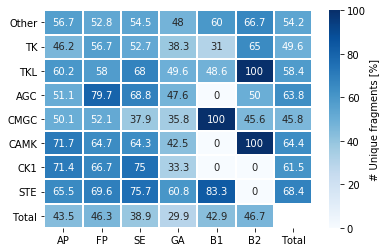

In [42]:
sns.heatmap(n_unique, linewidths=1, annot=True, cbar_kws={"label": "# Unique fragments [%]"}, cmap="Blues", fmt='g')
plt.show()

In [43]:
# average number of unique fragments per kinase group
sum(n_unique_total.drop('Other'))/7

58.84285714285714

In [44]:
sum(n_unique_sp)/6

41.36666666666667